In [2]:
## Load data
import glob
import pandas as pd
import pickle

# group = 'gender'
group = 'race'
df = pd.read_csv(r'/home/hbt/jchr_data/jchr_racial_diff/results/preprocessed_data/1_2_model_input_ws60min_ph60min_v6.csv')




# Define the path to your folder
folder_path = rf'/home/hbt/jchr_data/jchr_racial_diff/results/processed_data/2_1_1_predicted_results_rnn_v6_{group}'

# Pattern to match the files
file_pattern = f'{folder_path}/patient*_ratio*.pkl'

# Dictionary to store the data
dictionary = {}

# Iterate over files matched by glob
for file_path in glob.glob(file_pattern):
    with open(file_path, 'rb') as file:
        # Extracting N and X from the filename
        filename = file_path.split('/')[-1]  # Adjust if necessary based on your OS
        patient_id, ratio_id = filename.replace('.pkl', '').split('_')
        # Extracting numeric parts from patient_id and ratio_id
        patient_num = ''.join(filter(str.isdigit, patient_id))
        ratio_num = ''.join(filter(str.isdigit, ratio_id))
        
        # Load the content of the file
        file_data = pickle.load(file)

        # Store the data
        dictionary.update(file_data)

# Now loaded_data contains all your files' data
outer_keys = dictionary.keys()
print("Outer keys:", list(outer_keys))
inner_keys = dictionary[(172, 100)].keys()
print("Inner keys:", list(inner_keys))

### Extract one PtID with one ratio from dictionary

In [ ]:
y_actual = dictionary[(172, 10)]['y_actual']
y_pred = dictionary[(172, 10)]['y_pred']

SEG scores: [0.29517   0.        0.40204   0.61069   0.61069   0.0025445 0.74555
 0.7659    0.7659    0.010178  0.10687   0.        0.47583   0.69975
 0.64122   0.44275   0.21628   0.053435  0.        0.17557   0.22646
 0.16539   0.0025445 0.22646   0.69211   0.26718   0.26972   0.
 0.29008   0.69466   0.40967   0.0025445 0.28753   0.29517   0.48092
 0.48092   0.49109   0.62087   0.33842   0.77608   0.44275   0.21628
 0.1374    0.22646   0.63868   0.58015   0.42748   0.1374    0.17557
 0.42239   0.47583   0.70992   0.22646   0.0076336 0.42748   0.47583
 0.071247  0.84224   1.2494    0.80662   0.35369   0.0050891 0.035623
 0.038168  0.38931   0.035623  0.21374   0.048346  0.4173    0.61578
 0.61578   0.52926   0.5598    0.51399   1.1323    1.1908    1.0356
 1.4198    1.0992    1.0127    1.0025    1.4911    0.40204   0.4631
 1.2595    1.313     0.38931   1.6463    1.7226    1.7048    1.3969
 0.70483   1.1908    1.1781    0.61832   0.10941   0.54453   0.53944
 1.0102    1.1196    0.75318 

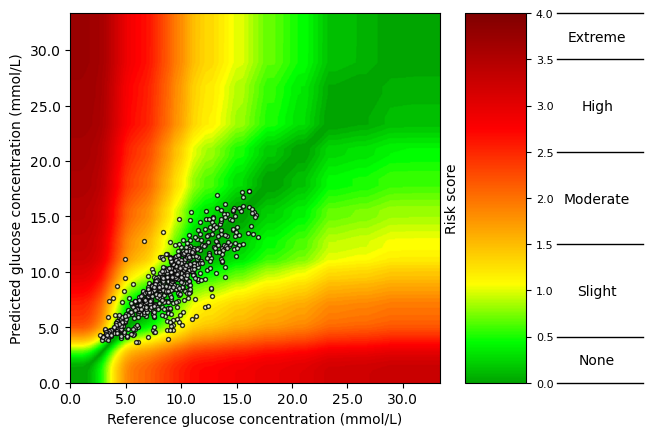

In [ ]:


from random import uniform

import matplotlib.pyplot as plt

from methcomp import seg, segscores

# zones = segscores(y_actual, y_pred, units="mmol")
# print("SEG scores: {}".format(zones))

# seg(y_actual, y_pred, units="mmol", percentage=False)
# plt.show()

In [ ]:
import my_utils
import numpy as np
iteration = 1
dict_results = {}

for (PtID, percentage), value in dictionary.items():

    # print('Iteration:',iteration,'PtID:',PtID,'ratio:' ,percentage)
    iteration=iteration+1
    
    # My actual/true values and my baseline value
    y_actual = value['y_actual']
    y_last_value = value['y_last_val']
    y_pred_single = value['y_pred_single']
    y_pred_base = value['y_pred']
    y_pred_tl = value['y_pred_tl']
    y_last_value2 = y_last_value.values.reshape(-1, 1) # make y_last_val to nparray (672,1) from Series (672,)
        
        
    zones_base = segscores(y_actual, y_pred_base, units="mmol")
    zones_naive = segscores(y_actual, y_last_value, units="mmol")
    zones_single = segscores(y_actual, y_pred_single, units="mmol")
    zones_tl = segscores(y_actual, y_pred_tl, units="mmol")
     
    dict_results[(PtID, percentage)] = {
        "ptid_test": value['PtId_test'],
        "ptid_group": value['ptid_group'],
        "zones_naive": zones_naive,
        "zones_single": zones_single,
        "zones_base": zones_base,
        "zones_tl": zones_tl
    
    }


NameError: name 'dictionary' is not defined

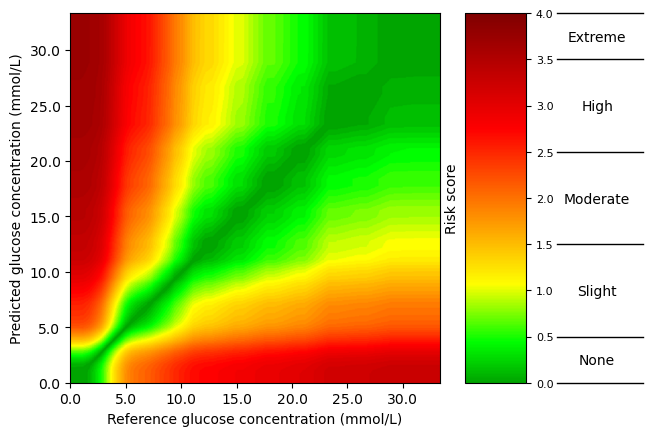

Clarkes zones: [1, 1, 3, 1, 0, 2, 3, 2, 1, 4, 4, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 3, 0, 1, 2, 1, 0, 3, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 3, 0, 3, 3, 2, 2, 1, 0, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 3, 1, 1, 0, 2, 3, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 1, 3, 0, 3, 2, 2, 0, 1, 0, 1, 2, 4, 0, 1, 3, 3, 2, 1, 2, 1, 1, 1, 3, 1, 0, 3, 3, 0, 3, 2, 1, 2, 3, 2, 3, 3, 2, 1, 0, 4, 3, 1, 1, 1, 4, 3, 0, 4, 0, 2, 4, 2, 3, 3, 0, 1, 0, 2, 1, 1, 1, 0, 1, 3, 1, 0, 3, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 3, 2, 2, 1, 2, 0, 1, 0, 0, 3, 0, 2, 0, 1, 4, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 3, 1, 1, 2, 2, 3, 1, 2, 1, 0, 3, 2, 1, 2, 2, 2, 0, 3, 2, 1, 3, 0, 1, 2, 2, 1, 2, 2, 0, 3, 3, 3, 1, 2, 3, 3, 0, 1, 2, 2, 1, 1, 1, 0, 1, 3, 2, 2, 3, 1, 2, 1, 1, 2, 3, 1, 1, 0, 3, 1, 1, 1, 4, 3, 0, 1, 3, 3, 1, 3, 0, 2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 3, 2, 0, 1, 1, 0, 3, 1, 1, 2, 2, 2]


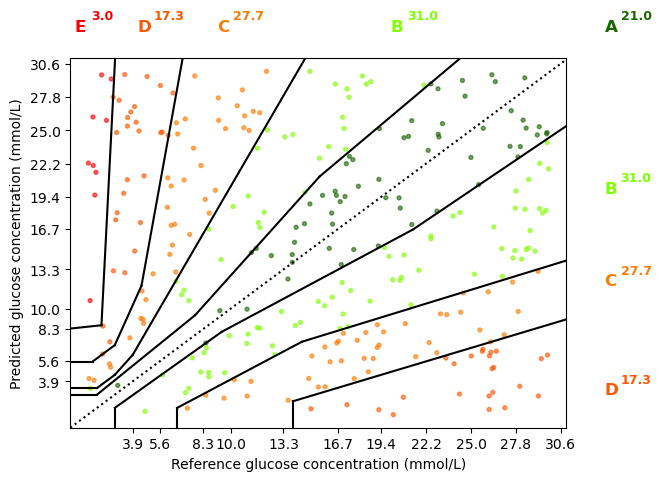